Install commands:

```
pip install matplotlib pandas scipy seaborn
```

In [3]:
import pandas

In [4]:
import matplotlib

In [5]:
%matplotlib inline

In [6]:
ls

jetstream-analysis.ipynb  jetstream.csv  README.md


In [7]:
usage = pandas.read_csv('jetstream.csv')

In [8]:
usage


,login,jobs,sus_charged
0,1,506,3175.10
1,2,1319,11504.46
2,3,186,1151.24
3,4,343,2106.60
4,5,17,63.41
5,6,452,1486.68
6,7,18,66.28
7,8,519,12574.86
8,9,114,675.85
9,10,60,322.92


In [9]:
from matplotlib import pyplot


(array([19.,  1.,  6.,  0.,  3.,  1.,  1.,  2.,  1.,  0.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

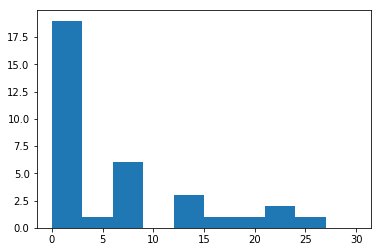

In [12]:
pyplot.hist(usage.jobs / 24, bins=10, range=(0, 30))

(array([26.,  6.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([2.9300000e+00, 1.2601230e+03, 2.5173160e+03, 3.7745090e+03,
        5.0317020e+03, 6.2888950e+03, 7.5460880e+03, 8.8032810e+03,
        1.0060474e+04, 1.1317667e+04, 1.2574860e+04]),
 <a list of 10 Patch objects>)

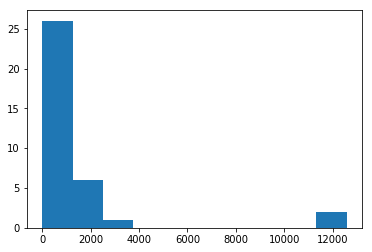

In [11]:
pyplot.hist(usage.sus_charged)

/srv/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


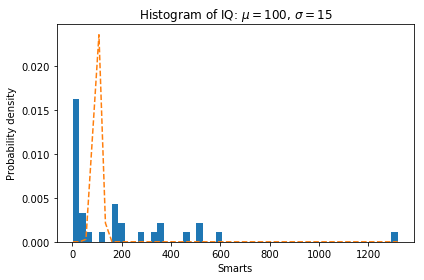

In [13]:
"""
=========================================================
Demo of the histogram (hist) function with a few features
=========================================================

In addition to the basic histogram, this demo shows a few optional
features:

    * Setting the number of data bins
    * The ``normed`` flag, which normalizes bin heights so that the
      integral of the histogram is 1. The resulting histogram is an
      approximation of the probability density function.
    * Setting the face color of the bars
    * Setting the opacity (alpha value).

Selecting different bin counts and sizes can significantly affect the
shape of a histogram. The Astropy docs have a great section on how to
select these parameters:
http://docs.astropy.org/en/stable/visualization/histogram.html
"""

import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(usage.jobs, num_bins, normed=1)

# add a 'best fit' line
y = mlab.normpdf(bins, mu, sigma)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

In [14]:
mlab.normpdf?

/srv/venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/srv/venv/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `factorial` is deprecated!
Importing `factorial` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.factorial` instead.
  app.launch_new_instance()
/srv/venv/lib/python3.6/site-packages/scipy/optimize/minpack.py:785: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


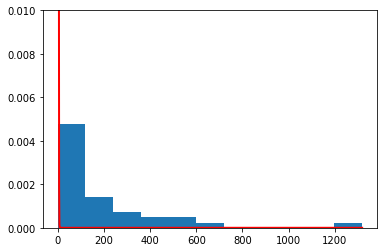

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.misc import factorial

data = usage.jobs

# the bins should be of integer width, because poisson is an integer distribution
entries, bin_edges, patches = plt.hist(data, bins=11, range=[-0.5, 1319], normed=True)

# calculate binmiddles
bin_middles = 0.5*(bin_edges[1:] + bin_edges[:-1])

# poisson function, parameter lamb is the fit parameter
def poisson(k, lamb):
    return (lamb**k/factorial(k)) * np.exp(-lamb)

# fit with curve_fit
parameters, cov_matrix = curve_fit(poisson, bin_middles, entries) 

# plot poisson-deviation with fitted parameter
x_plot = np.linspace(0, max(usage.jobs), 1000)

plt.plot(x_plot, poisson(x_plot, *parameters), 'r-', lw=2)
plt.axis(ymax=0.01)
plt.show()

In [28]:
import seaborn

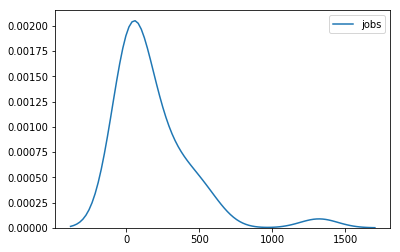

In [31]:
seaborn.kdeplot(usage.jobs)

Text(0,0.5,'SUs charged')

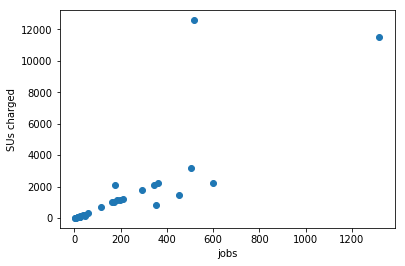

In [33]:
pyplot.scatter(usage.jobs, usage.sus_charged)
pyplot.xlabel('jobs')
pyplot.ylabel('SUs charged')

(-65.95044802867383, 700, -104.7911898454746, 700)

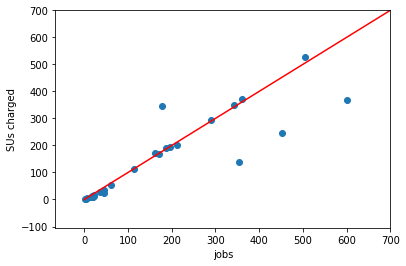

In [36]:
pyplot.scatter(usage.jobs, usage.sus_charged / 6.)
pyplot.plot([0, 700], [0, 700], 'r-')
pyplot.xlabel('jobs')
pyplot.ylabel('SUs charged')
pyplot.axis(xmax=700, ymax=700)

In [39]:
usage.sort_values(by='sus_charged')

,login,jobs,sus_charged
17,18,3,2.93
24,25,2,6.90
11,12,7,24.28
32,33,17,51.33
21,22,17,56.46
16,17,18,62.09
12,13,19,62.10
27,28,18,62.29
22,23,18,62.54
4,5,17,63.41
